IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop('timestamp',axis=1,inplace=True)
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]

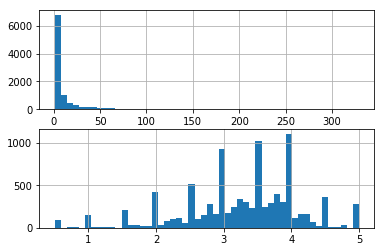

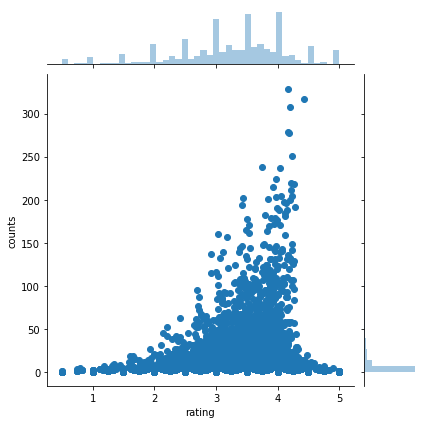

In [3]:
movie_data = pd.merge(ratings,movies,on='movieId') 
#movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
#print(movie_data)
mean_ratings = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
mean_ratings['counts'] = movie_data.groupby('title')['rating'].count()
#print(mean_ratings)

#Plotting graphs to study trends
plt.subplot(2,1,1)
mean_ratings['counts'].hist(bins=50)
plt.subplot(2,1,2)
mean_ratings['rating'].hist(bins=50)
sns.jointplot(x='rating',y='counts',data=mean_ratings)

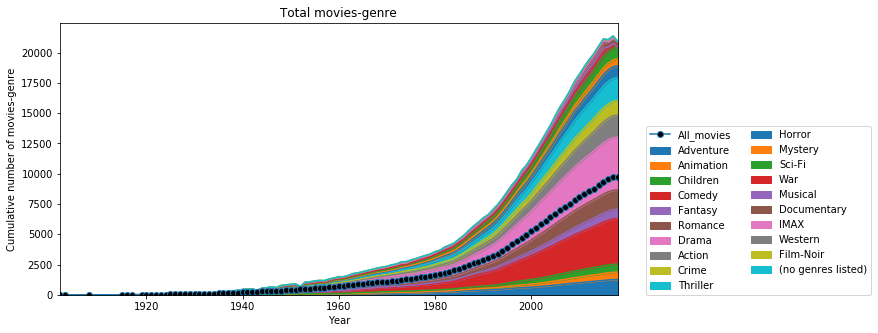

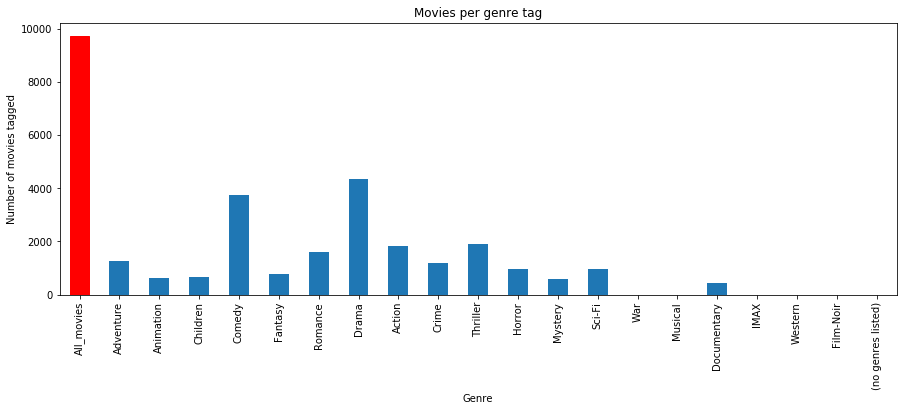

In [149]:
movies1 = movies.copy()
genres_unique = pd.DataFrame(movies1.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movies1 = movies1.join(movies.genres.str.get_dummies().astype(bool))
movies1.drop('genres', inplace=True, axis=1)
dftmp = movies1[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})
for genre in genres_unique.genre:
    dftmp = movies1[movies1[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()

df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5))
# Plot histogram for all movies
plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()
# Plot simple scatter of the number of movies tagged with each genre
plt.figure(figsize=(15,5))
barlist = df.iloc[-1].plot.bar()
barlist.patches[0].set_color('r') # Color 'All_movies' differently, as it's not a genre tag count
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.show()

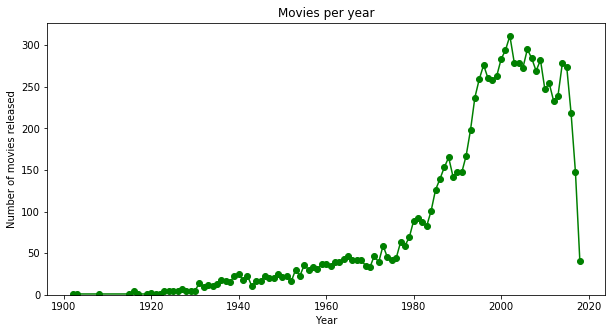

In [150]:
dftmp = movies[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(dftmp.year.first(), dftmp.movieId.nunique(), "g-o")
ax1.set_ylim(0,)

dftmp.head()
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released')
plt.title('Movies per year')
plt.show()